In [1]:
#Import required libaries for project

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
#Load data set from CSV into dataframe, and veiw first 5 rows of data

In [4]:
df = pd.read_csv('bestsellers with categories.csv')

In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
#Explore the numerical variables. 
#User rating: avg user rating is 4.61, with 50% of the ratings between 4.5 and 4.7, the maximum being 4.9. 
#Reviews: The least number of reviews is 37, wtih the maximum being 87,841. The average number of reviews is 11,953.
#Price: The mean price across all books is 13.1, the cheapest book is free, the most expensive book is 105. 50% of the population costs between 7 and 16. 

In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [9]:
#Explore the categorical variables
#Genre: Top 50 books are slightly skewed towards non-fiction
#Book Names: There are 351 unique books within the listing, suggested a number of books have remained in the top 50 for several years.
#Author Name: There are 248 unique author names. As this figure is less than book names, this means that some authors have had several books within the top 50, across multiple years.

In [10]:
df.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [11]:
df.Name.nunique()

351

In [12]:
df.Author.nunique()

248

In [13]:
#Explore descriptive statistics for fiction vs non-fiction
#From the below statistics we see that the mean user rating for non-fiction is lower than that for fiction, with fiction books also attracting a higher number of reviews. 
#Avergae price of non-fiction books is higher than for fiction books, covering a greater range, with standard dev of non-fiction books being greater than that of fiction books.

In [14]:
fiction = df[df.Genre == 'Fiction']

In [15]:
non_fiction = df[df.Genre == 'Non Fiction']

In [16]:
fiction.describe()

,User Rating,Reviews,Price,Year
count,240.000000,240.000000,240.00000,240.000000
mean,4.648333,15683.791667,10.85000,2013.925000
std,0.265123,13984.120890,8.57275,3.142801
min,3.300000,548.000000,0.00000,2009.000000
25%,4.600000,6162.500000,6.00000,2011.000000
50%,4.700000,10922.000000,9.00000,2014.000000
75%,4.800000,21834.000000,13.00000,2017.000000
max,4.900000,87841.000000,82.00000,2019.000000


In [17]:
non_fiction.describe()

,User Rating,Reviews,Price,Year
count,310.000000,310.000000,310.000000,310.000000
mean,4.595161,9065.145161,14.841935,2014.058065
std,0.189555,8606.737629,12.043241,3.186214
min,4.000000,37.000000,0.000000,2009.000000
25%,4.500000,3235.000000,8.000000,2011.000000
50%,4.600000,6346.000000,12.000000,2014.000000
75%,4.700000,11124.250000,17.000000,2017.000000
max,4.900000,61133.000000,105.000000,2019.000000


In [18]:
#Investigate data set by book names

In [19]:
#Create a data set of unique books

In [20]:
grouped_book = df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values('Price', ascending=False)

In [21]:
books = df["Name"].value_counts()
book_times = []
book_names = []
for i in range(len(books)):
    book_names.append(books.keys()[i])
    book_times.append(books[i])

In [22]:
popular_books = pd.DataFrame({"Name":book_names,"freq_name":book_times})
popular_books


,Name,freq_name
0,Publication Manual of the American Psychologic...,10
1,StrengthsFinder 2.0,9
2,"Oh, the Places You'll Go!",8
3,The Very Hungry Caterpillar,7
4,The 7 Habits of Highly Effective People: Power...,7
...,...,...
346,Strange Planet (Strange Planet Series),1
347,The Guernsey Literary and Potato Peel Pie Society,1
348,Puppy Birthday to You! (Paw Patrol) (Little Go...,1
349,"Grain Brain: The Surprising Truth about Wheat,...",1


In [23]:
grouped_book = pd.merge(grouped_book, popular_books, on="Name")



In [24]:
grouped_book.sort_values('freq_name',ascending = False).head()

,Name,Author,Genre,Price,freq_name
5,Publication Manual of the American Psychologic...,American Psychological Association,Non Fiction,46.000000,10
70,StrengthsFinder 2.0,Gallup,Non Fiction,17.000000,9
257,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,8.000000,8
313,The Very Hungry Caterpillar,Eric Carle,Fiction,5.000000,7
40,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,Non Fiction,20.571429,7


In [25]:
#From the below table we see that the book in the charts for the longest time is hte Publication Manual of the American Psychological association,staying in the top 50 for 10 years, with only 7 books remaining in the top 50 for more than 5 years. 

In [26]:
(df.Name.value_counts().head(10))

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
Unbroken: A World War II Story of Survival, Resilience, and Redemption                5
The Official SAT Study Guide                                                          5
How to Win Friends & Influence People                                                 5
Name: Name, dtype: int64

In [27]:
#Create a count plot showing the number of books remaining in the top 50 for x number of years:
#The majority of books are in the top 50 for just one year. Non-fiction books appear to have a greater longevity in the charts

Text(0, 0.5, 'Count of books')

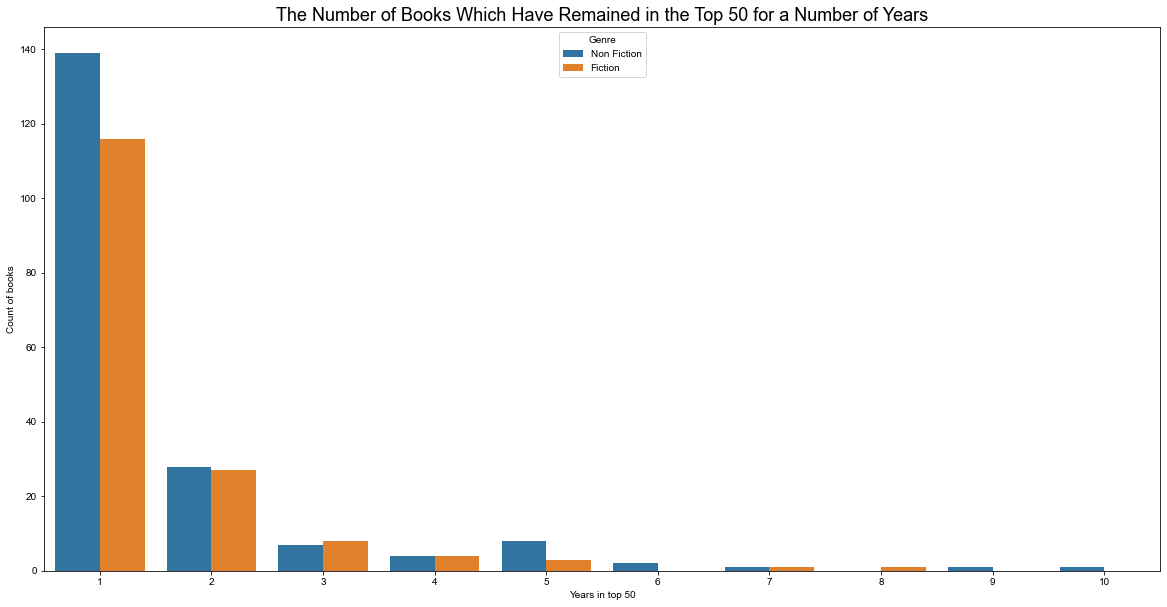

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(data = grouped_book, x = 'freq_name', hue = 'Genre')
sns.set(font_scale = 1.5)
plt.title('The Number of Books Which Have Remained in the Top 50 for a Number of Years')
plt.xlabel('Years in top 50')
plt.ylabel('Count of books')

In [29]:
grouped_book['avg_rating'] = df.groupby('Name')['User Rating'].transform('mean')

In [30]:
grouped_book.sort_values('avg_rating', ascending = False).head()

,Name,Author,Genre,Price,freq_name,avg_rating
81,"National Geographic Kids Why?: Over 1,111 Answ...",Crispin Boyer,Non Fiction,16.0,1,4.9
41,Under the Dome: A Novel,Stephen King,Fiction,20.0,1,4.9
85,The Girl Who Played with Fire (Millennium),Stieg Larsson,Fiction,16.0,1,4.9
84,George Washington's Secret Six: The Spy Ring T...,Brian Kilmeade,Non Fiction,16.0,1,4.9
83,Howard Stern Comes Again,Howard Stern,Non Fiction,16.0,1,4.9


In [31]:
#From the below plots we can see little spread between ratings, historgram shows ratings are left-skewed. Fiction books show a greater spread, which is clearer within the violin plot. Fiction books show greater pull to the hgiher end of ratings, with non-fiction books tending to take a lower rating.

Text(0.5, 1.0, 'Frequency of user ratings across the top rated books')

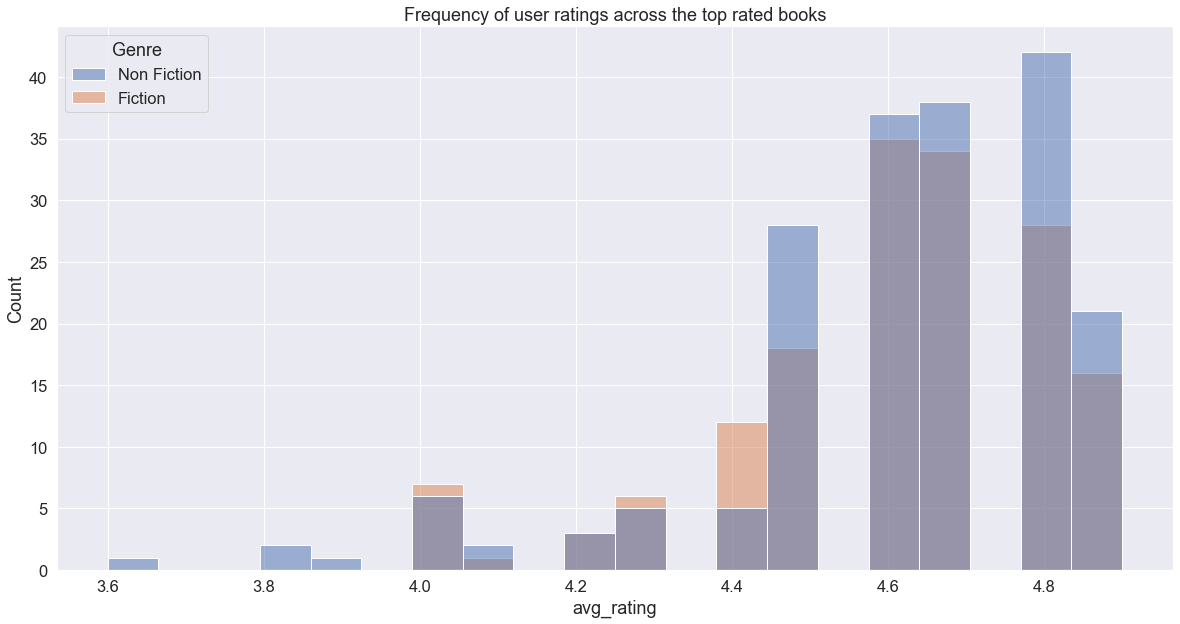

In [32]:
plt.figure(figsize=(20,10))
sns.histplot(data = grouped_book, x = 'avg_rating', hue = 'Genre', bins = 20)
plt.title('Frequency of user ratings across the top rated books')

<AxesSubplot:xlabel='Genre', ylabel='avg_rating'>

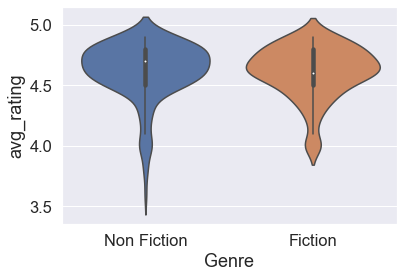

In [33]:
sns.violinplot(data= grouped_book,x = 'Genre', y = 'avg_rating')

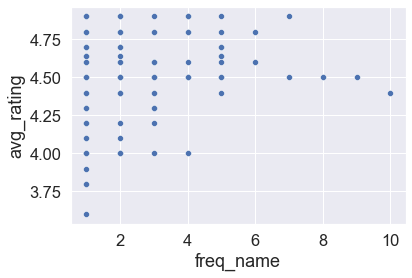

In [34]:
sns.scatterplot(data = grouped_book, x = 'freq_name', y = 'avg_rating')
plt.show()

In [35]:
#Investigate Data by Author
#Most popular authors: The author mostly seen on the listing is Jeff Kinney

In [36]:
grouped_author = df.groupby(['Author'], as_index=False)['Price'].mean().sort_values('Price', ascending=False)

In [37]:
grouped_author.head()

,Author,Price
10,American Psychiatric Association,105.0
146,Lin-Manuel Miranda,54.0
28,Bill Simmons,53.0
11,American Psychological Association,46.0
6,Alan Moore,42.0


In [38]:
authors = df["Author"].value_counts()
author_times = []
author_names = []
for i in range(len(authors)):
    author_names.append(authors.keys()[i])
    author_times.append(authors[i])

In [39]:
popular_authors = pd.DataFrame({"Author":author_names,"freq_author":author_times})


In [40]:
grouped_author = pd.merge(grouped_author, popular_authors, on="Author")
grouped_author.sort_values('freq_author', ascending = False)

,Author,Price,freq_author
158,Jeff Kinney,9.250000,12
43,Gary Chapman,17.181818,11
155,Rick Riordan,9.909091,11
89,Suzanne Collins,13.363636,11
3,American Psychological Association,46.000000,10
...,...,...,...
75,Pierre Dukan,15.000000,1
147,David Perlmutter MD,10.000000,1
146,Chris Cleave,10.000000,1
145,Mary Ann Shaffer,10.000000,1


Text(0, 0.5, 'Count of books')

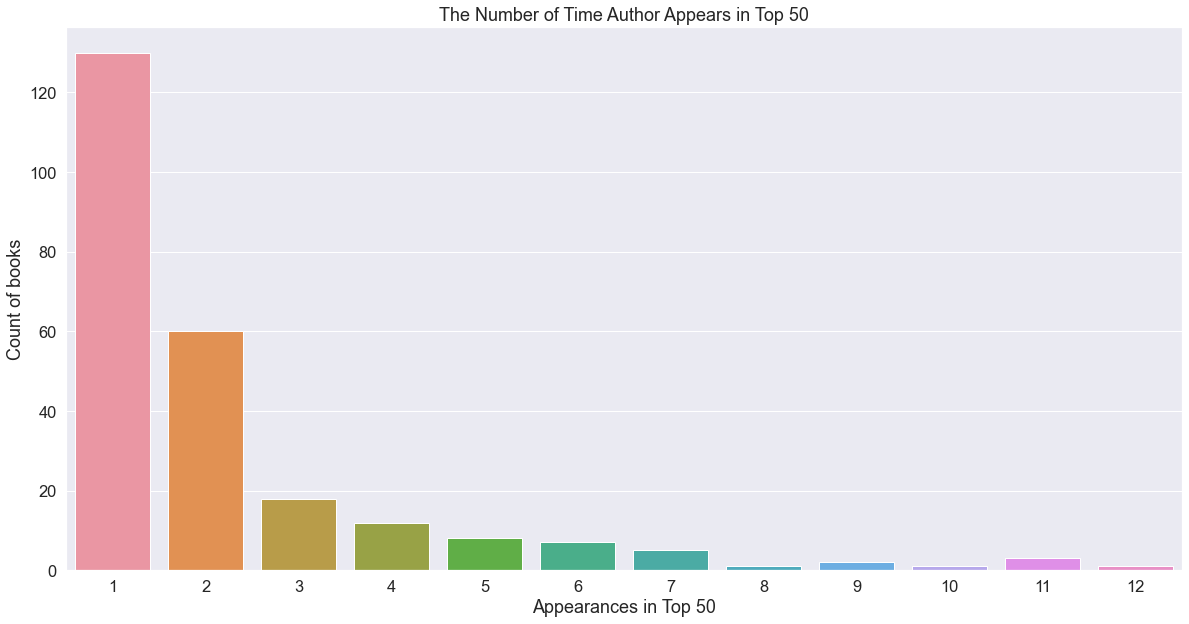

In [41]:
plt.figure(figsize = (20,10))
sns.countplot(data = grouped_author, x = 'freq_author')
sns.set(font_scale = 1.5)
plt.title('The Number of Time Author Appears in Top 50')
plt.xlabel('Appearances in Top 50')
plt.ylabel('Count of books')

In [42]:
author_books = df.groupby('Author')['Name'].nunique()
ab_times = []
ab_names = []
for i in range(len(author_books)):
    ab_names.append(authors.keys()[i])
    ab_times.append(authors[i])

In [43]:
author_books.sort_values(ascending = False)

Author
Jeff Kinney            12
Rick Riordan           10
Stephenie Meyer         7
Dav Pilkey              6
Bill O'Reilly           6
                       ..
Margaret Wise Brown     1
Margaret Atwood         1
Madeleine L'Engle       1
M Prefontaine           1
Abraham Verghese        1
Name: Name, Length: 248, dtype: int64

In [44]:
author_books = author_books.to_frame()

In [45]:
author_books.reset_index(level=0, inplace=True)

In [46]:
author_books.sort_values('Name',ascending = False)

,Author,Name
120,Jeff Kinney,12
197,Rick Riordan,10
221,Stephenie Meyer,7
113,J.K. Rowling,6
27,Bill O'Reilly,6
...,...,...
89,Fredrik Backman,1
90,Gallup,1
91,Garth Stein,1
93,Gayle Forman,1


In [47]:
grouped_author = pd.merge(grouped_author, author_books, on="Author")


In [52]:
grouped_author.rename(columns = {'Name':'n_unique_books'}, inplace = True)

In [53]:
grouped_author.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Author          248 non-null    object 
 1   Price           248 non-null    float64
 2   freq_author     248 non-null    int64  
 3   n_unique_books  248 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 19.7+ KB


Text(0, 0.5, 'Count of Authors')

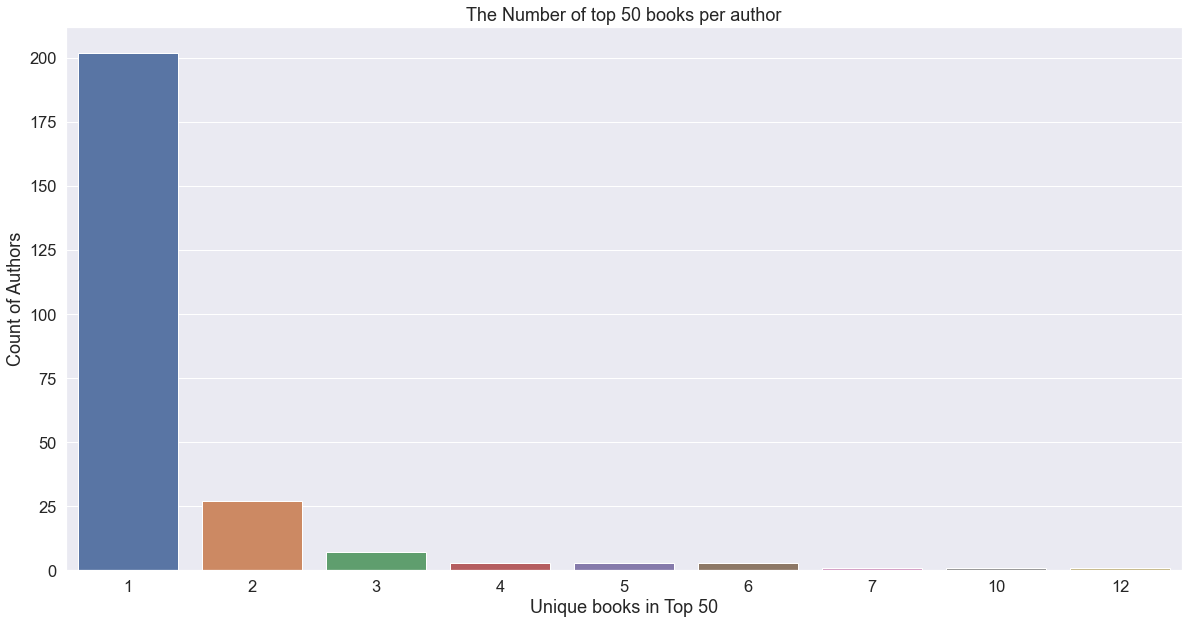

In [54]:
plt.figure(figsize = (20,10))
sns.countplot(data = grouped_author, x = 'n_unique_books')
sns.set(font_scale = 1.5)
plt.title('The Number of top 50 books per author')
plt.xlabel('Unique books in Top 50')
plt.ylabel('Count of Authors')

In [55]:
grouped_author['avg_rating'] = df.groupby('Author')['User Rating'].transform('mean')

In [56]:
grouped_author.head()

,Author,Price,freq_author,n_unique_books,avg_rating
0,American Psychiatric Association,105.0,2,1,4.700
1,Lin-Manuel Miranda,54.0,1,1,4.525
2,Bill Simmons,53.0,1,1,4.700
3,American Psychological Association,46.0,10,1,4.700
4,Alan Moore,42.0,1,1,4.800


In [ ]:
#Investigation of Average Rating over Time

<AxesSubplot:xlabel='Year', ylabel='User Rating'>

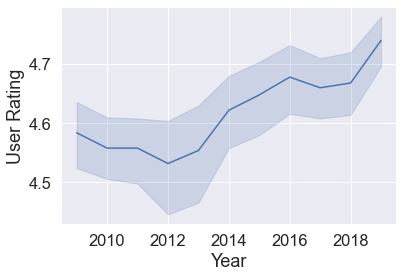

In [57]:
sns.lineplot(data = df, x = 'Year', y = 'User Rating')

<AxesSubplot:xlabel='Year', ylabel='User Rating'>

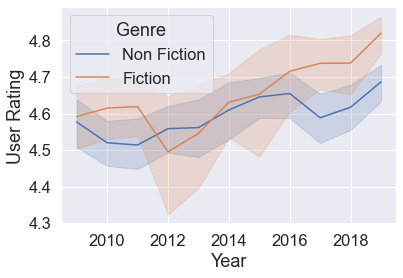

In [59]:
sns.lineplot(data = df, x = 'Year', y = 'User Rating', hue = 'Genre')

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

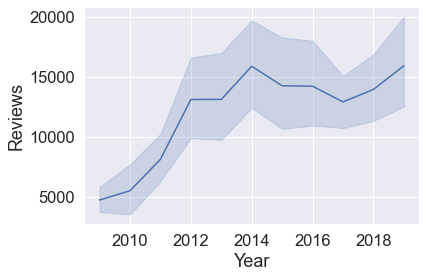

In [58]:
sns.lineplot(data = df, x = 'Year', y = 'Reviews')

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

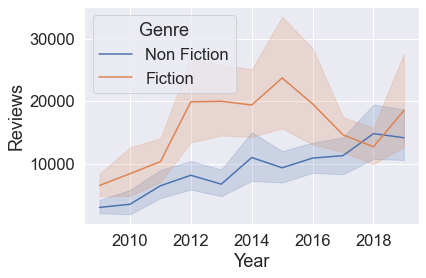

In [63]:
sns.lineplot(data = df, x = 'Year', y = 'Reviews', hue = 'Genre')

<AxesSubplot:xlabel='User Rating', ylabel='Reviews'>

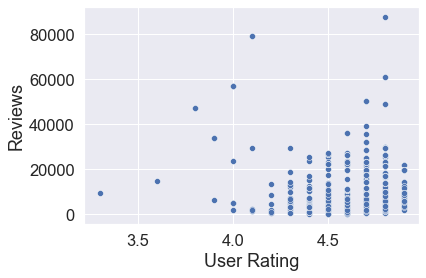

In [60]:
sns.scatterplot(data = df, x = 'User Rating', y = 'Reviews')

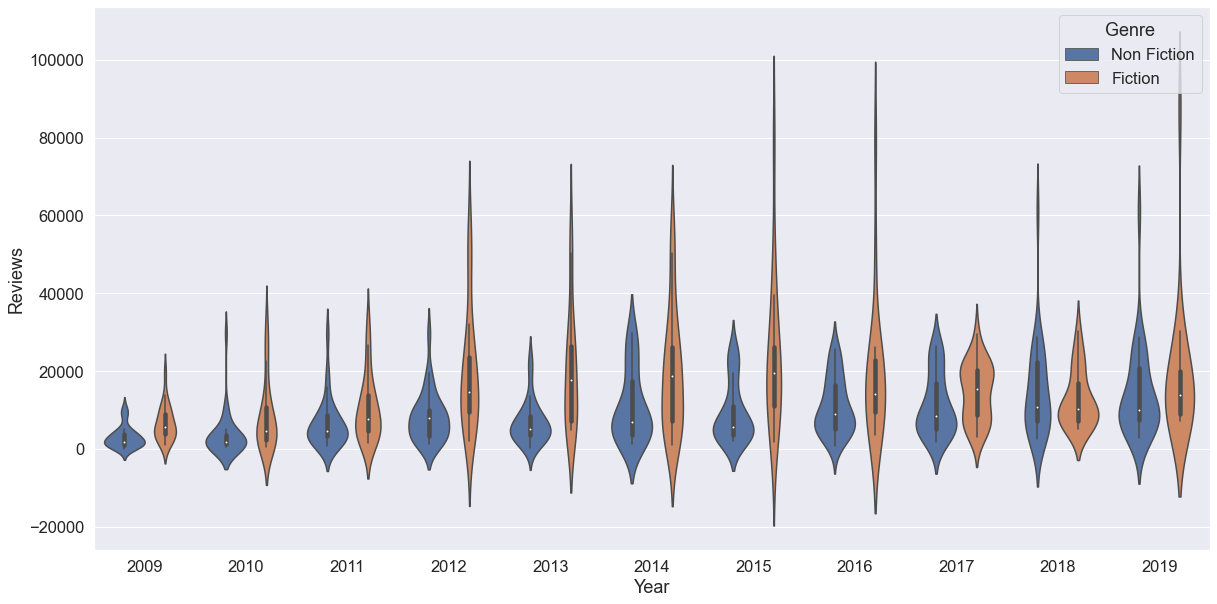

In [61]:
plt.figure(figsize = (20,10))
sns.violinplot(data = df, x = 'Year', y = 'Reviews', hue = 'Genre')
plt.show()

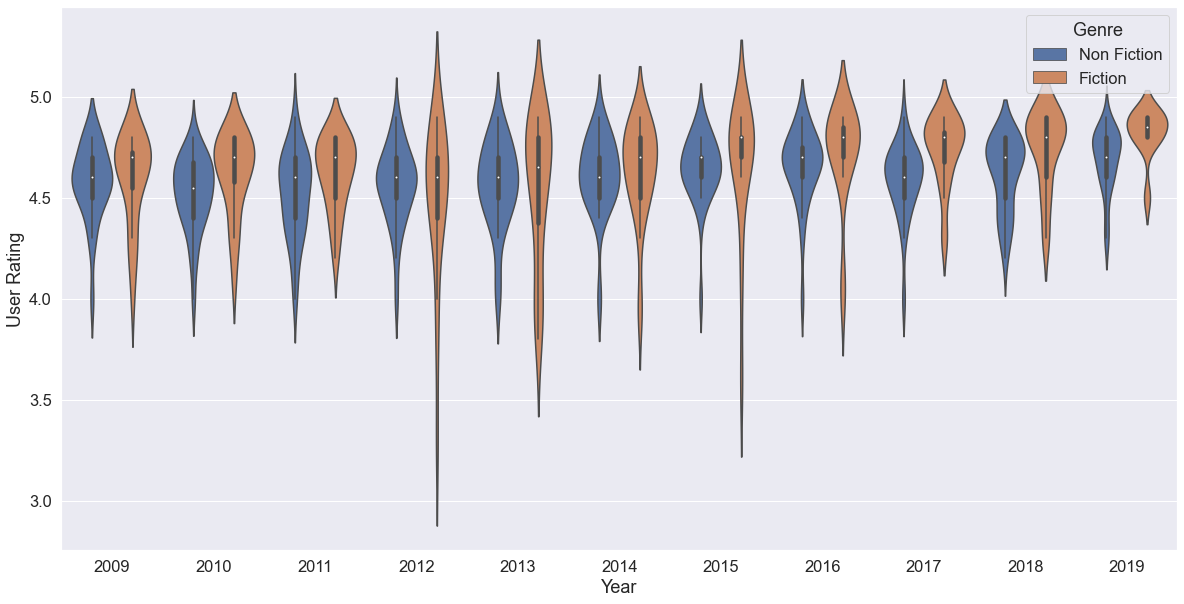

In [62]:
plt.figure(figsize = (20,10))
sns.violinplot(data = df, x = 'Year', y = 'User Rating', hue = 'Genre')
plt.show()

(0.0, 40.0)

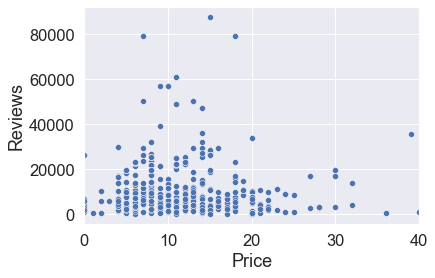

In [65]:
sns.scatterplot(data = df, x = 'Price', y = 'Reviews')
plt.xlim(0,40)

<AxesSubplot:xlabel='Year', ylabel='Price'>

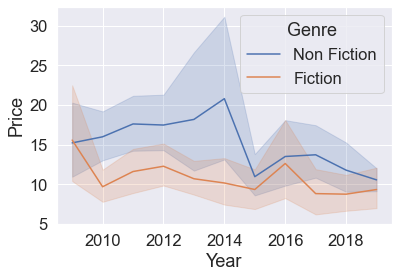

In [66]:
sns.lineplot(data = df, x = 'Year', y = 'Price', hue = 'Genre')

<AxesSubplot:xlabel='Year', ylabel='count'>

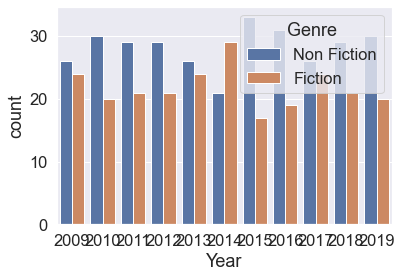

In [67]:
sns.countplot(data = df, x = 'Year', hue = 'Genre')